# Webscraping using Python and Beautiful Soup

## Introduction

The web contains a lot of information we want to use. Some websites, like Google provides programmatic access to these information (sometimes for free!), via Application Programming Interface (API). For example, Google provides [Places API](https://developers.google.com/places/) to access information available on Google Maps. 

However, sometimes APIs are not available, and we can only access these data via a web page. In this case, we need to use a technique called **Web Scrapping**, to extract the data from a webpage, and format it in a way we can use.

In this notebook, we will show you the basics on webscraping using *Python* and *Beautiful Soup*, a web-scraping library.
We will try to scrape weather forecasts from [National Weather Service (US)](http://www.weather.gov/). Before we learn webscraping, we will also learn about what comprises of a website and how they are structured.

### References
Before we start, here are some useful references:

>[Python 3](https://docs.python.org/3/)

>[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

>[National Weather Services (US)](https://www.weather.gov)

>[W3school web tutorials](https://www.w3schools.com/)

<br><br>


## Tutorial Content
This tutorial consists of the following sections:

#### HTML Basics
><a href="#URL">URL</a><br>
><a href="#HTML">HTML</a><br>
><a href="#ChromeInspector">Chrome Inspector</a>

#### Python Basics\* 
> <a href="#Requests">Requests Library</a><br>
> <a href="#BeautifulSoup">Beautiful Soup Library</a><br>

\* 
some basic knowledge of Python is assumed

<br><br>


***
         
# Webpage Basics 

When we visit a web page using a web browser (Internet Explorer, Google Chrome, Mozilla Firefox, etc.), our web browser makes a request to a web server, identified by the *web address*, or more formally, **Uniform Resource Locator** - **URL** for short.

<br>
# URL
The picture below shows an annotated URL link:

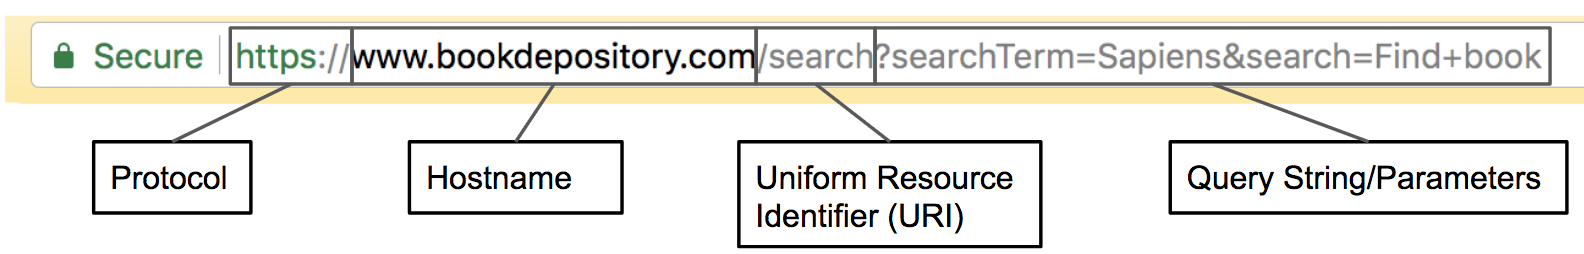



**Protocol** *(HTTPS://)* - The protocol used to communicate with the web server. You don't have to know this, but if you are interested, find out more [here](https://www.instantssl.com/ssl-certificate-products/https.html).

**Hostname** *(www.bookdepository.com)* - The "address" of the webserver. We use hostnames to find the correct webserver to send out requests to. 

**Uniform Resource Identifier** *(/search)* - URI for short. URIs are used to tell the web server what we want. In this case, we want to perform a search. 

**Query String/Parameter** *(?searchTerm=Sapiens&search=Find+Book)* - The query string refers to the part of the URL after the question mark (?). These are additional information instructing the details of what we want. In this case, we tell the server we want to search the site with the URI. Then we specify what we are searching for with the query string.






<br>
***
## Components of a Web Page

After sending a request to the webserver on what we want, we would receive some files back from the server. The files tell the browser how to render the web page for us and these files fall into a few main types:



>**[HTML](https://www.w3.org/TR/html/)** - Contains the main content of the page. This content includes the actual content of the site, how the content is structured, how to style the content, and additional files to request from the server.



>**[CSS](https://www.w3schools.com/css/)** - The CSS files usually work in conjunction with the HTML file to style the page. We don't have to worry about this file.



>**[Javascript, JS](https://developer.mozilla.org/en-US/docs/Learn/Getting_started_with_the_web/JavaScript_basics)** - Javascript files add interactivity to web pages. Nowadays, more and more websites are relying on Javascript to, not only add interactivity, but are essential to the proper functioning and displays of websites. This presents some challenge for us in web scraping certain websites. For a start, we would avoid these sites.



Multimedia - These incude images, videos, etc, to display on websites.



After the browser receives all the files, it renders the page according to those files and display it to us. A lot is happening behind the scenes to display the page nicely, but, for the purpose of web scraping, we are only concerned with the main content of the page, so we shall only look at the **HTML** file.


<br><br>
***


# HTML

HyperText markup Language (HTML) is a language that web pages are created in. It is not a *programming language*, and is only a language that tells a browser how the content of a web page is structured. The structuring allows to layout and style the content as we wish. 
<br>
### HTML Tags
HTML consists of elements called tags. Tags look something like that: `<html>`. This tag tells the web browser that everything that follows the tag is HTML. A simple web page would then look something like this: 

```
<html>
</html>
```

Notice the second tag has a `/` infront. This is a closing tag, as opposed to opening tag, `<html>`. It tells the HTML when the tag should end. Having opening and closing tags enable us to structure web pages, by specifying tags to contain other tags or texts. 

For example, 

```
<html>
I am inside the HTML tag
</html>
I am outside the HTML tag.
```


<br><br>
For a typical site, immediately inside a `<html>` tag would be `<body>` tag. This tag specifies the start of the actual content that the user is supposed to see.


Here's a simple website:

```
<html>
    <head>
    </head>
    <body>
        <p>
            Here's a paragraph of text!
        </p>
        <p>
            Here's a second paragraph of text!
        </p>
    </body>
</html>
```
<br><br>
and here's how this page would look like
<br>
<div style="border: 1px solid black;">
    <p>
            Here's a paragraph of text!
        </p>
        <p>
            Here's a second paragraph of text!
        </p>
</div>
<br><br>

We often refer to tags in relation to other tags. For example:

>**Children** - a child tag is inside another tag. In the above example, the 2 `<p>` tags are children of `<body>` tag.

>**parent** - Similarly, the `<body>` tag encapsulates the 2 `<p>` tags and are therefore parent tag of the 2 `<p>` tags.

>**siblings** - The 2 `<p>` tags share the same parent tag and are therefore, sibling tags.

* note that each tag can only have **1** parent tag but multiple children/sibling tags.

### Common tags
Some common tags we will encounter are listed below:
>**[HTML](https://www.w3schools.com/tags/tag_html.asp)** - tells the browser this is an HTML element.

>**[head](https://www.w3schools.com/tags/tag_head.asp)** - contains title for the web page, scripts, styles, or meta information about the page.

>**[body](https://www.w3schools.com/tags/tag_body.asp)** - contains the actual content meant for viewing by visitors of the page.

>**[div](https://www.w3schools.com/tags/tag_div.asp)** - a common tag to sub-divide a page content into sections/division.

>**[span](https://www.w3schools.com/tags/tag_span.asp)** - a tag to group elements that are to be displayed in a single line. 


<br><br>

### HTML Tag Attributes
Tag can contain attributes or properties. Attributes are additional data attached to each tag as further instructions for the web browser on how to render the page. Below, we define a `class` attribute on the `<p>` tag:
```
<p class="bold">
    Here's a paragraph of text!
</p>
```

The [HTML 5](https://www.w3.org/TR/html5/) standard defines some standard tag for the browsers to use. However, you can make up your own attributes, therefore, there's almost no restrictions on what attributes you can see on web pages. This [page](https://www.w3schools.com/html/html_attributes.asp) lists some common attributes.

<br><br><br>
***


# ChromeInspector

To view the HTML documents, we can use a tool built into the [Google Chrome Browser](https://www.google.com/chrome/browser/desktop/index.html), called DevTools. Similar tools exist for To open the tool,

1. Go to any page you like, **right-click** on an element of interest on the page, and select **inspect**.

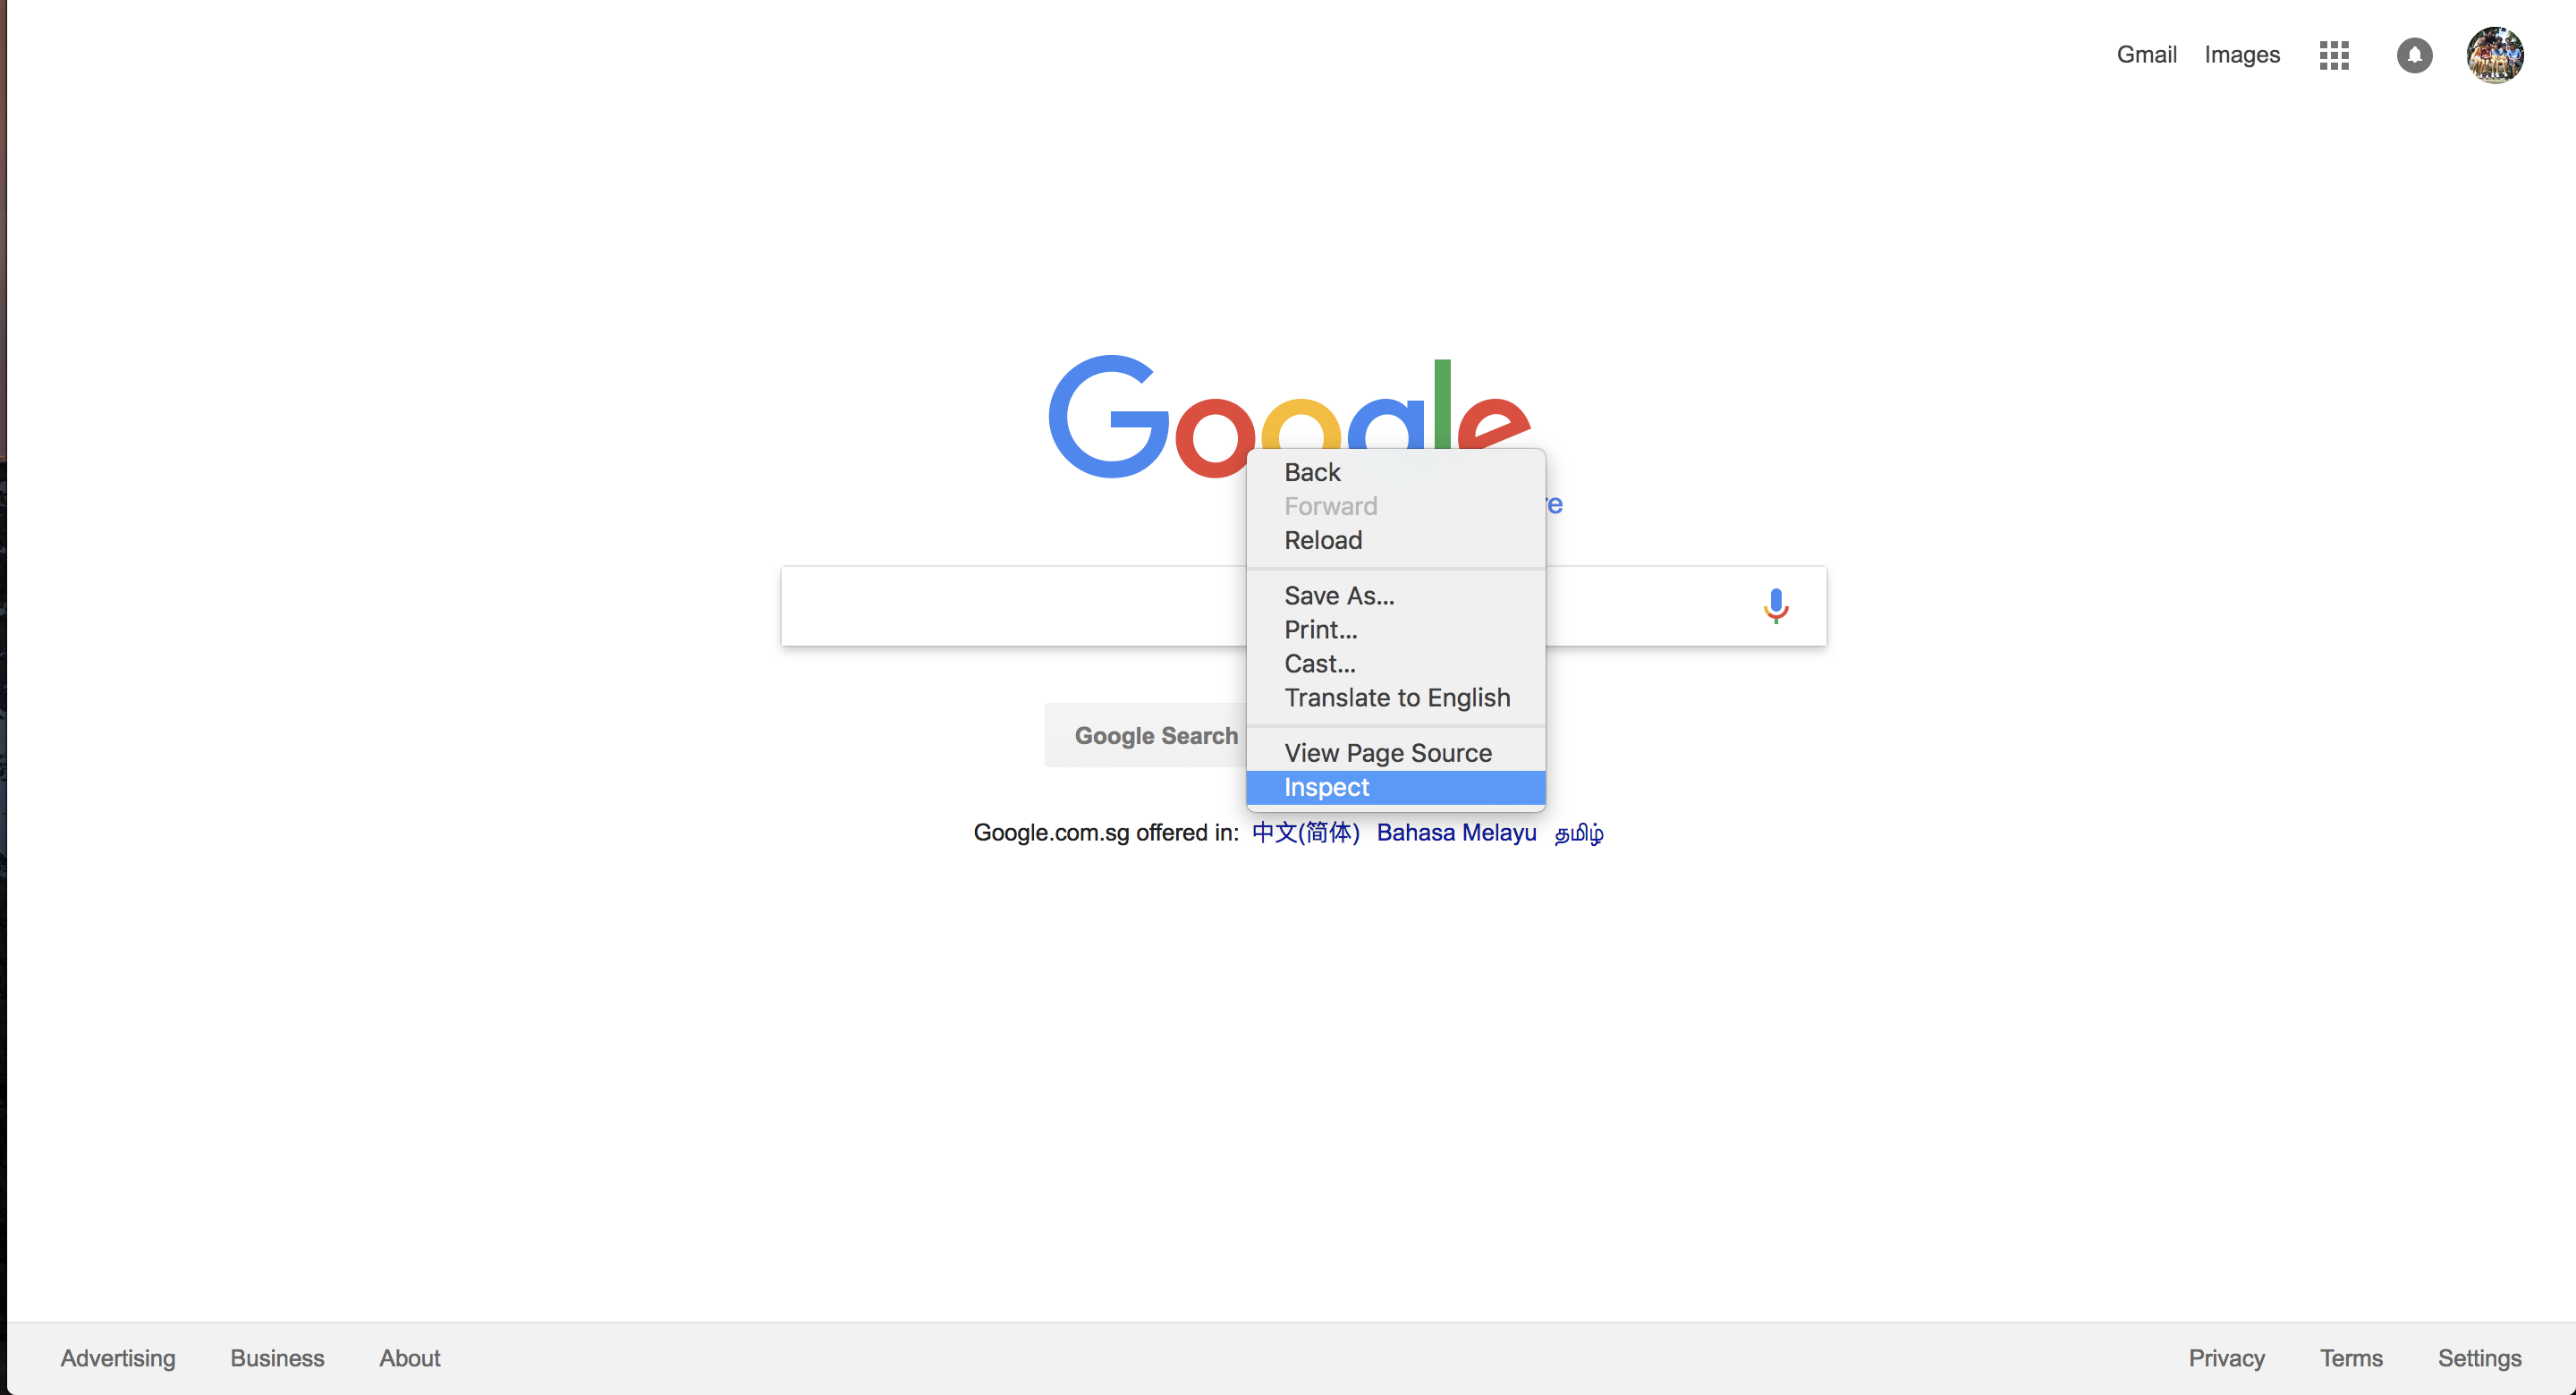

<br><br>

2. A side-bar should pop up. This is the Chrome DevTool window with the inspector shown:

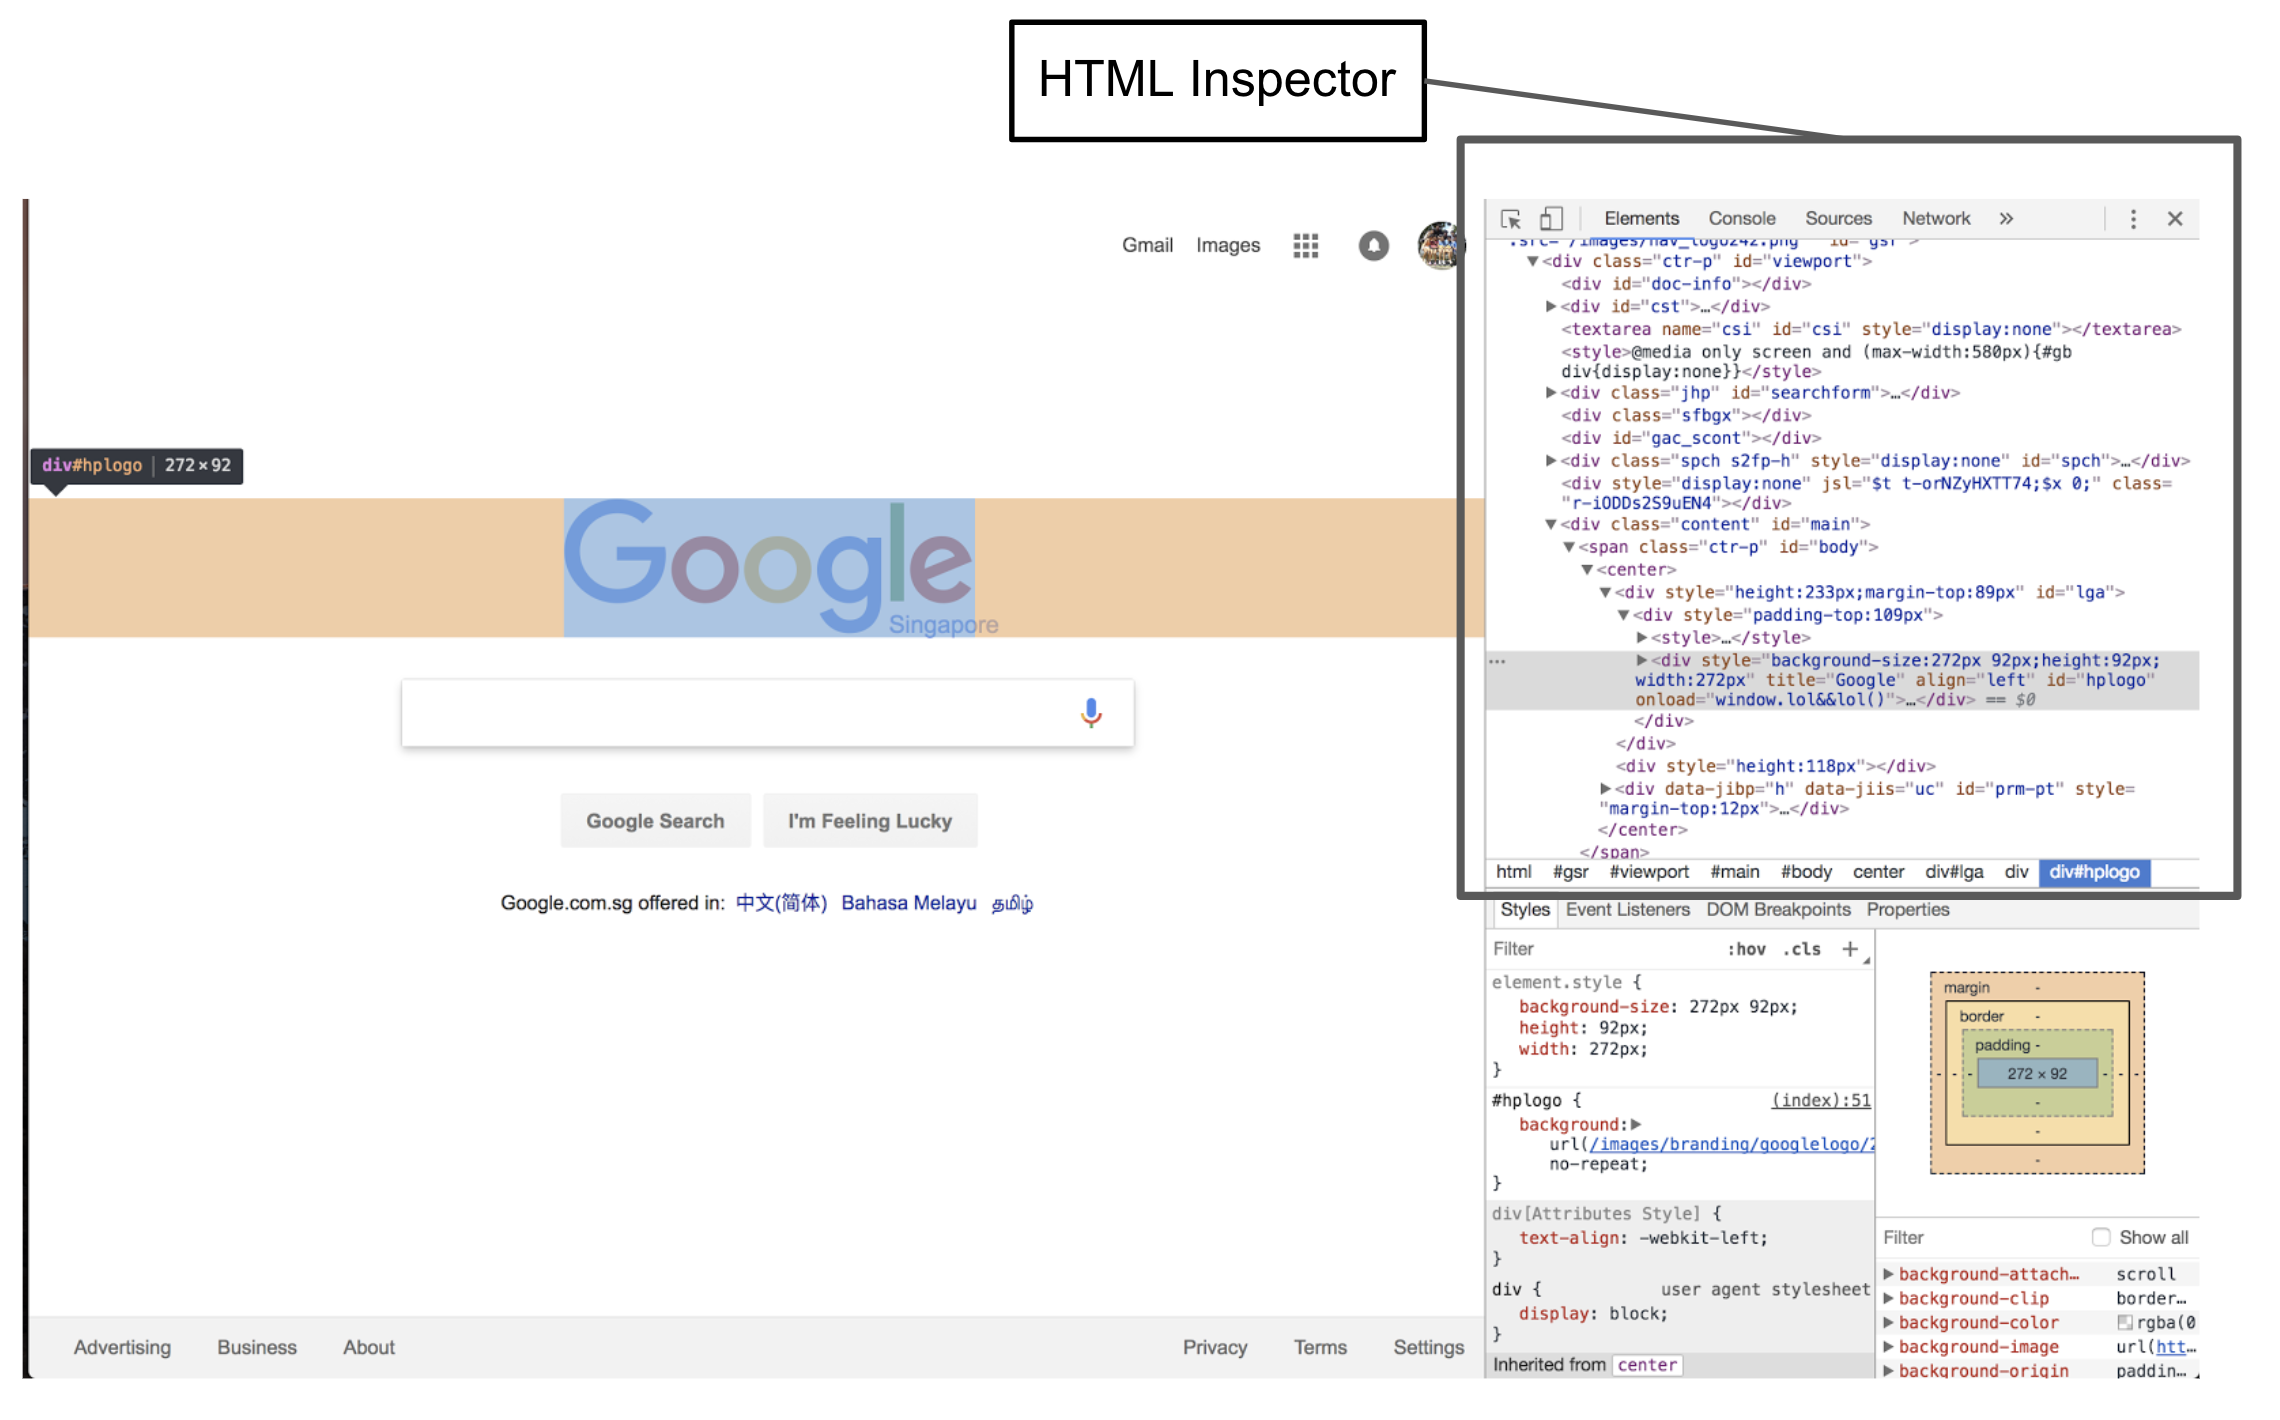

Hovering over elements on the HTML inspector should highlight the corresponding element in the webpage.

<br><br>
3. You can click on the tiny triangle on the left of a tag to see its children. Alternatively, you can use the arrow keys to navigate and traverse through the elements.

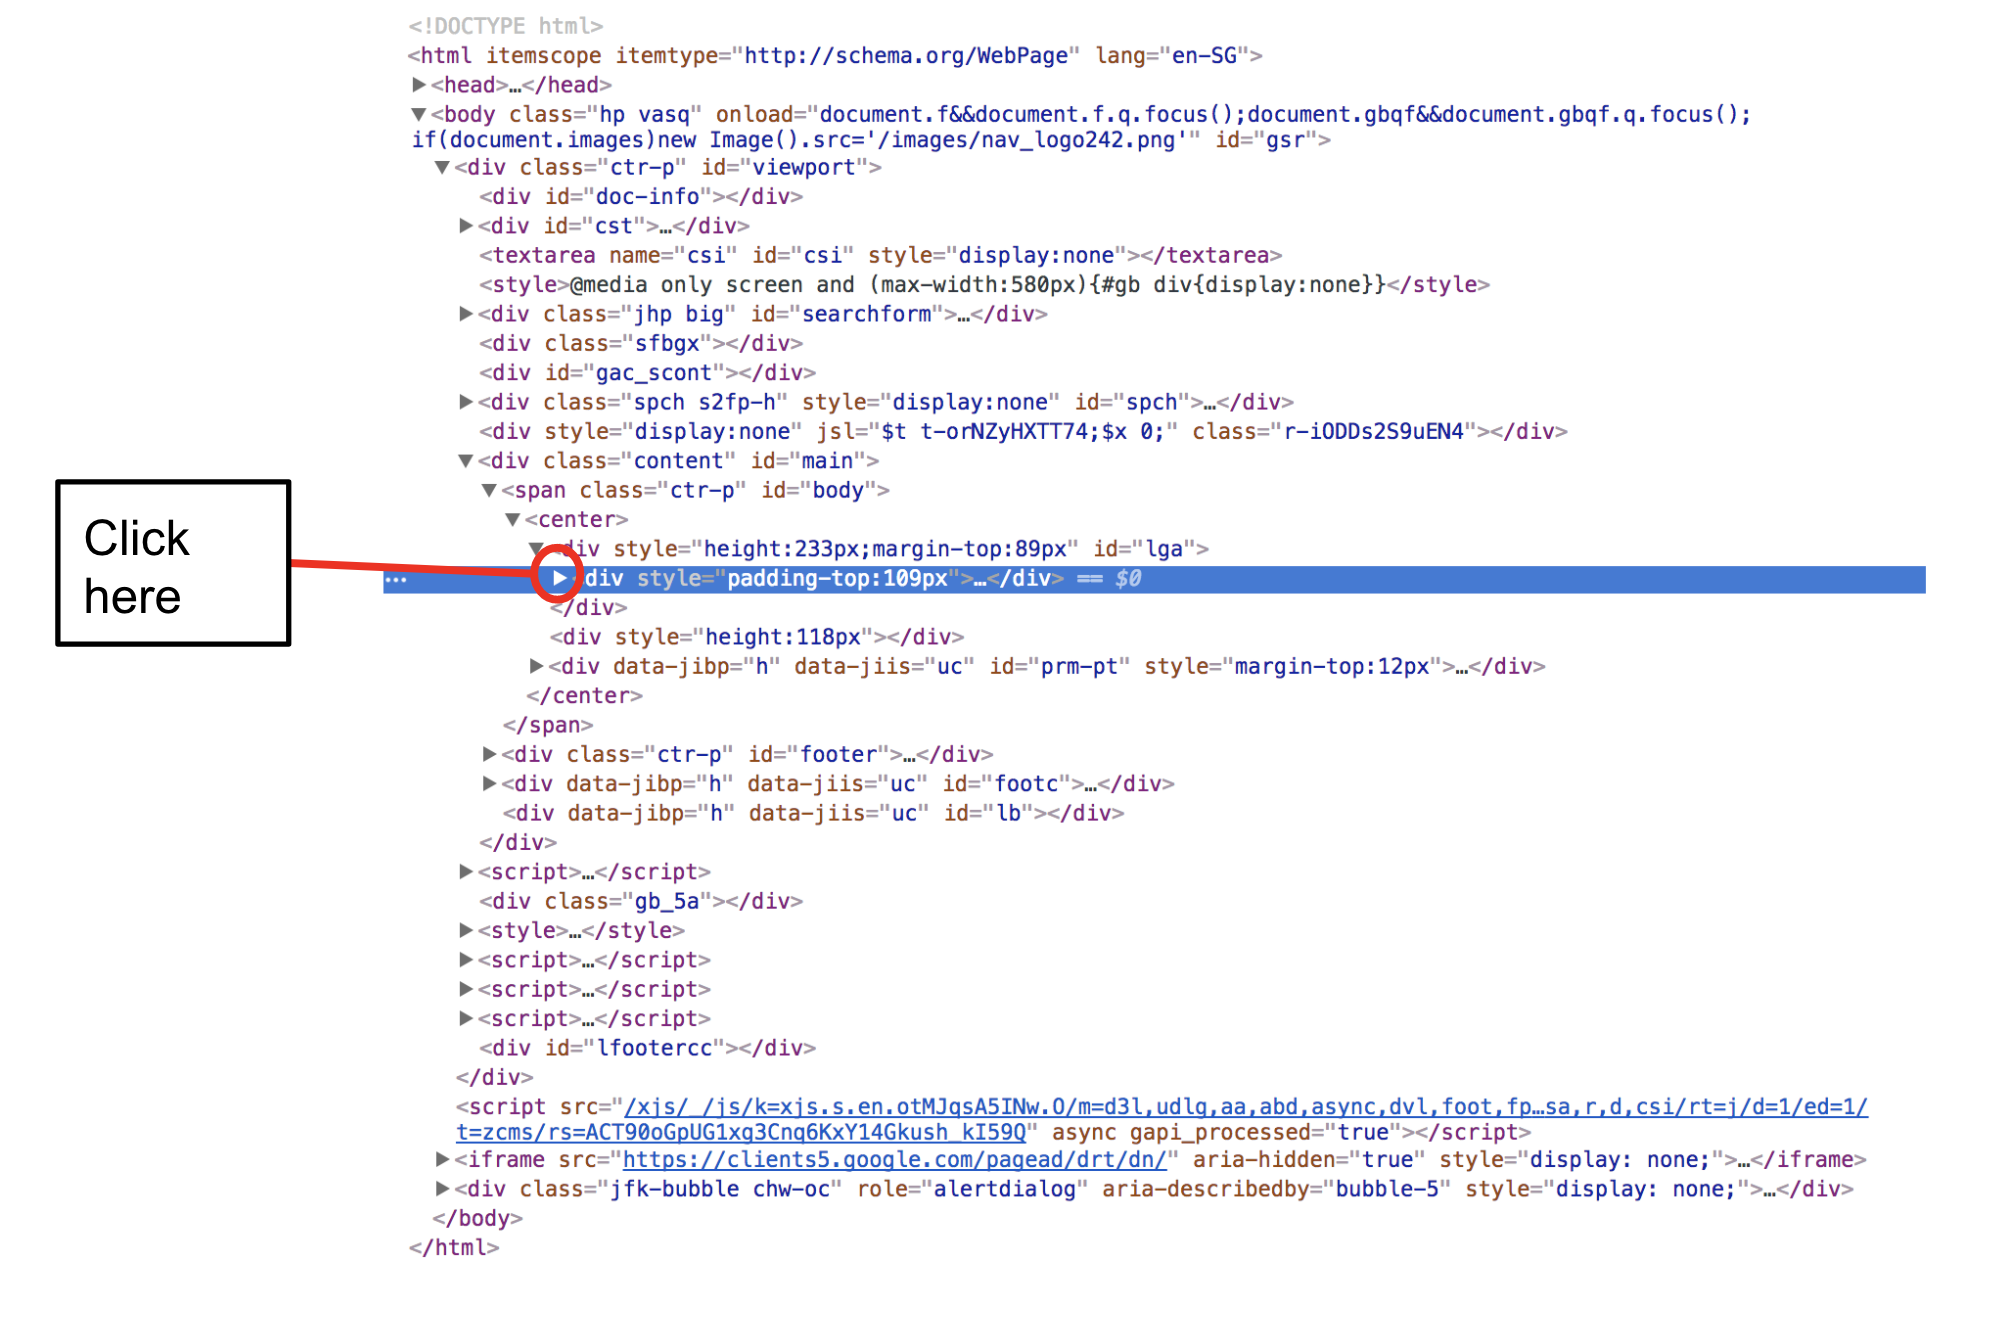

<br><br><br>

The Google Chrome Inspector does alot more than allow you to view the HTML document. To learn more, click [here](https://developer.chrome.com/devtools).


***
<br><br><br>
# Requests

`requests` is a built-in Python library to download web pages. The library helps us make requests to web server which we are then able to web scrape for data. Click on the code block below and then click on the `run` button above.

In [14]:
import requests

page = requests.get("https://zweihan.github.io/Rebot/simple.html")
print(page)

<Response [200]>


<br>
You should see 
`<Response [200]>`

After running our request, we should get a [`Response`](http://docs.pythonrequests.org/en/master/user/quickstart/#response-content) object. The response object has `status_code` property which represents the if the page was downloaded successfully:


In [15]:
page.status_code

200

<br>
`Status_code` of 200 means the page is downloaded successfully, while code in the 4XX and 5XX range indicates an error.
We can print out the html content of the page using:
<br><br>

In [16]:
print(page.content)

b'<!DOCTYPE html>\n<html>\n  <head>\n    <title>\n      Simple page title\n    </title>\n  </head>\n  <body>\n    <div class="title">\n      This is a simple page\n    </div>\n  </body>\n</html>\n'


<br>
What you see after running the code block above is the raw HTML file. It can be pretty hard to read and extract information we need from the page. Fortunately, libraries exists to make both tasks easier. One such library is Beautiful Soup.
<br><br><br>
***

# BeautifulSoup

In the previous section, we have downloaded some document. We would use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to parse the HTML document.
<br><br>

In [18]:
from bs4 import BeautifulSoup
parsed_page = BeautifulSoup(page.content, 'html.parser')
print(parsed_page.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Simple page title
  </title>
 </head>
 <body>
  <div class="title">
   This is a simple page
  </div>
 </body>
</html>



<br><br>
<div class="alert alert-info">
<h3>Google Chrome Inspector</h3><br>
For simple pages, such as the one above, we can just print out the html page. For more complex pages, such as those we would encounter on the web, this would not be a good idea. 

Fortunately, [Google Chrome browser](https://www.google.com/chrome/browser/desktop/index.html) has a pretty good inspector tool built-in, enabling us to traverse the HTML document with ease. 

Click [here](http://blog.galvanize.com/how-to-use-chrome-devtools-for-the-absolute-beginner/) to learn more about how to use the inspector.
</div>
<br><br><br>


### BeautifulSoup Object

The line, 
`parsed_page = BeautifulSoup(page.content, 'html.parser')`
passes the entire HTML document to BeautifulSoup. In return, beautiful soup processes and stores the page as a `beautifulSoup` object. 
This allows us to search and traverse the HTML document using Python.

For example, notice that the `<div>` tag in the HTML document above has attribute, `class`. 
To retrieve the class, we can use:
<br><br>

In [22]:
div_class = parsed_page.find("div", class_="title")
print(div_class)

<div class="title">
      This is a simple page
    </div>


<br><br>
To get the text within the tag,
<br><br>


In [24]:
div_class.getText().strip()

'This is a simple page'

<br><br>
With beautifulSoup, web scraping is transformed to:
1. Identifying the HTML tag that our data is contained in.
2. Get the HTML tag element.
3. Get the information we need. 

<br><br>

## Try it yourself!
[Here](http://books.toscrape.com/) is a site purpose-built for beginners to learn web scraping. Try to get all the titles of the page!
(hint) You might want to call `soup.find_all` instead of `soup.find`.